In [83]:
import pandas as pd
import plotly
import plotly.graph_objects as go
Indian_Energyn=pd.read_csv("/content/sankey_energy.csv")

In [82]:
Indian_Energyn

,type,Energy Form,Type Of Energy,Consumption,Year,Total,Per Capita
0,Fossil Fuels,Non renewable,Oil Consumption - EJ,517.636209,1985,1574.709176,2007.636
1,Fossil Fuels,Non renewable,Oil Consumption - EJ,897.839536,1995,2945.223906,3055.456
2,Fossil Fuels,Non renewable,Oil Consumption - EJ,1464.246185,2005,4600.368817,4009.038
3,Fossil Fuels,Non renewable,Oil Consumption - EJ,2316.802119,2015,7990.736675,6099.980
4,Fossil Fuels,Non renewable,Oil Consumption - EJ,2843.930590,2019,9459.693095,6923.931
5,Fossil Fuels,Non renewable,Gas Consumption - EJ,43.228316,1985,1574.709176,2007.636
6,Fossil Fuels,Non renewable,Gas Consumption - EJ,180.778435,1995,2945.223906,3055.456
7,Fossil Fuels,Non renewable,Gas Consumption - EJ,343.256650,2005,4600.368817,4009.038
8,Fossil Fuels,Non renewable,Gas Consumption - EJ,478.068758,2015,7990.736675,6099.980
9,Fossil Fuels,Non renewable,Gas Consumption - EJ,596.808968,2019,9459.693095,6923.931


In [72]:
def get_sankey(data,path,value_col):
    sankey_data = {
    'label':[],
    'source': [],
    'target' : [],
    'value' : []
    }
    counter = 0
    while (counter < len(path) - 1):
        for parent in data[path[counter]].unique():
            sankey_data['label'].append(parent)
            for sub in data[data[path[counter]] == parent][path[counter+1]].unique():
                sankey_data['source'].append(sankey_data['label'].index(parent))
                sankey_data['label'].append(sub)
                sankey_data['target'].append(sankey_data['label'].index(sub))
                sankey_data['value'].append(data[data[path[counter+1]] == sub][value_col].sum())

        counter +=1
    return sankey_data

In [73]:
Indian_Energyn.columns

Index(['type', 'Energy Form', 'Type Of Energy', 'Consumption', 'Year', 'Total',
       'Per Capita'],
      dtype='object')

In [74]:
my_sankey = get_sankey(Indian_Energyn,['Year','type','Energy Form','Type Of Energy']
       ,'Consumption')

In [81]:
import random
colours=['red','blue','pink','green','yellow','purple']
my_colours=[]
for col in range (0,len(my_sankey['label'])):
    my_colours.append(random.choice(colours))
#my_colours=[col for col in len(my_sankey['label']) random.choice(colours)]
Sankey_figures = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = my_sankey['label'],
      color = my_colours
    ),
    link = dict(
      source = my_sankey['source'],
      target = my_sankey['target'],
      value = my_sankey['value']
  ))])
Sankey_figures.update_layout(title_text="Energy Consumption Trends in India (1985-2019)")
Sankey_figures.show()

<Figure size 1000x600 with 0 Axes>

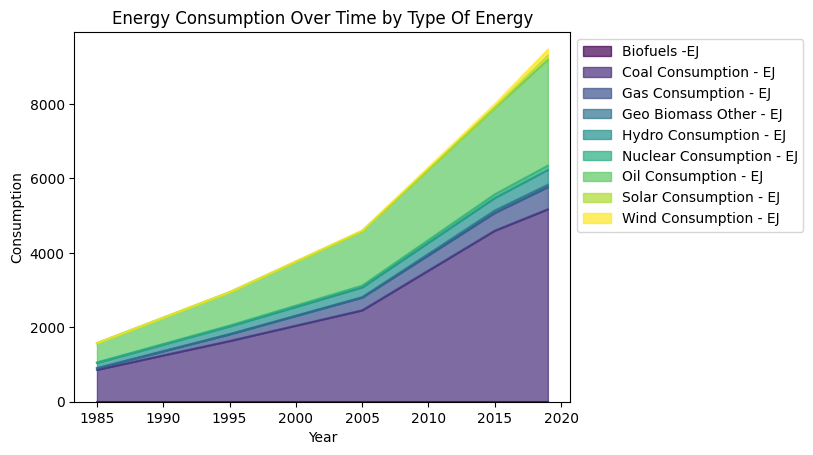

In [76]:
import matplotlib.pyplot as plt
import pandas as pd

stacked_1 = Indian_Energyn.pivot(index='Year', columns='Type Of Energy', values='Consumption')

plt.figure(figsize=(10, 6))
stacked_1.plot(kind='area', stacked=True, colormap='viridis', alpha=0.7)

plt.xlabel('Year')
plt.ylabel('Consumption')
plt.title('Energy Consumption Over Time by Type Of Energy')

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


In [77]:
import plotly.express as px
import pandas as pd

print("Column Names:", Indian_Energyn.columns)

# Creating a TreeMap
Tree_map = px.treemap(Indian_Energyn, path=['type', 'Energy Form', 'Type Of Energy'], values='Consumption',color='Consumption',
                 color_continuous_scale='Viridis',
                 title='Energy Consumption TreeMap')
# Showing the plot
Tree_map.show()


Column Names: Index(['type', 'Energy Form', 'Type Of Energy', 'Consumption', 'Year', 'Total',
       'Per Capita'],
      dtype='object')


In [78]:
import plotly.express as px
import pandas as pd

Barplot_1 = px.bar(Indian_Energyn, x='Year', y='Consumption', color='Type Of Energy',labels={'Consumption': 'Energy Consumption'},title='Energy Consumption by Type Of Energy Over Time')
Barplot_1.update_layout(xaxis_title='Year', yaxis_title='Energy Consumption')
fig.show()


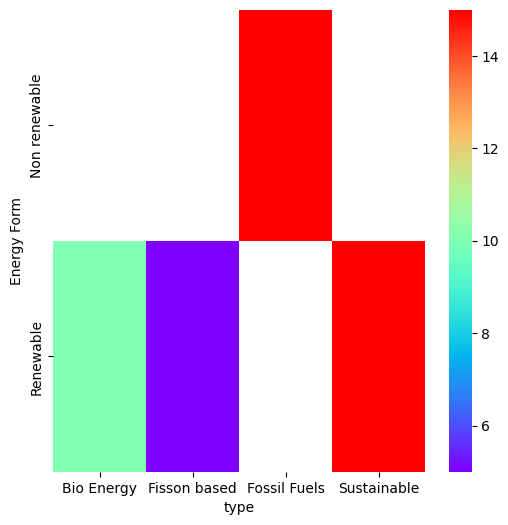

In [79]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(6, 6))
Mapping = pd.DataFrame({
    x_label: grp['Energy Form'].value_counts()
    for x_label, grp in Indian_Energyn.groupby('type')
})
sns.heatmap(Mapping, cmap='rainbow')
plt.xlabel('type')
_ = plt.ylabel('Energy Form')

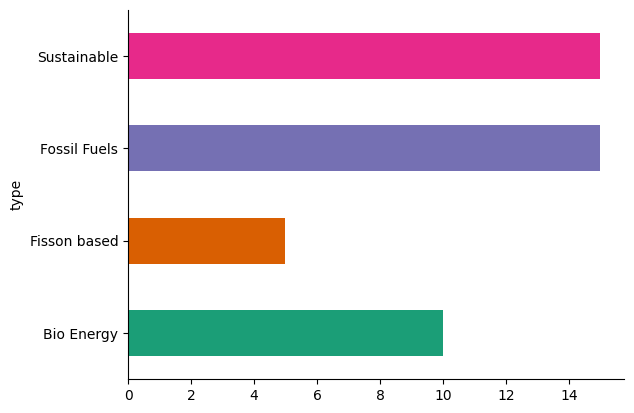

In [80]:
from matplotlib import pyplot as plt
import seaborn as sns
Indian_Energyn.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)